In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

2021-08-02 15:12:18.455769: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0
2021-08-02 15:12:20.022519: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-08-02 15:12:21.387406: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-02 15:12:21.388313: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-08-02 15:12:21.388408: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0
2021-08-02 15:12:21.463331: I tensorflow/stream_executor/platform/defa

In [5]:
print(tf.config.list_physical_devices('GPU'))
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1


In [4]:
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only use the first GPU
#   try:
#     tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
#     logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
#   except RuntimeError as e:
#     # Visible devices must be set before GPUs have been initialized
#     print(e)

1 Physical GPUs, 1 Logical GPU


2021-07-28 19:52:22.131047: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-28 19:52:22.131868: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-07-28 19:52:22.131956: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0
2021-07-28 19:52:22.132007: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.11
2021-07-28 19:52:22.132041: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.so.10
2021-07-28 19:52:22.132073: I tensorflow/stream_executor/platform/defa

In [6]:
!pip install segmentation-models

In [7]:
import tensorflow as tf
from tensorflow import keras 

import segmentation_models as sm
sm.set_framework('tf.keras')
sm.framework()

import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

from keras.utils import conv_utils
from keras.backend import normalize_data_format
keras.backend.set_image_data_format('channels_last')
from keras.metrics import MeanIoU


Using TensorFlow backend.


Segmentation Models: using `keras` framework.


In [8]:
pwd

'/home/jupyter/prpls-dl/deeplearning-prpls'

In [9]:
# import zipfile
!unzip '/home/jupyter/prpls-dl/tiles_256.zip' -d '/tmp'

Archive:  /home/jupyter/prpls-dl/tiles_256.zip
   creating: /tmp/test_256/
   creating: /tmp/test_mask_256/
   creating: /tmp/train_256/
   creating: /tmp/train_mask_256/
   creating: /tmp/val_256/
   creating: /tmp/val_mask_256/
  inflating: /tmp/test_256/test_img_634777_4866280.tif  
  inflating: /tmp/test_256/test_img_634777_4866284.tif  
  inflating: /tmp/test_256/test_img_634777_4866289.tif  
  inflating: /tmp/test_256/test_img_634777_4866293.tif  
  inflating: /tmp/test_256/test_img_634777_4866298.tif  
  inflating: /tmp/test_256/test_img_634777_4866303.tif  
  inflating: /tmp/test_256/test_img_634777_4866307.tif  
  inflating: /tmp/test_256/test_img_634777_4866312.tif  
  inflating: /tmp/test_256/test_img_634777_4866316.tif  
  inflating: /tmp/test_256/test_img_634777_4866321.tif  
  inflating: /tmp/test_256/test_img_634777_4866326.tif  
  inflating: /tmp/test_256/test_img_634777_4866330.tif  
  inflating: /tmp/test_256/test_img_634777_4866335.tif  
  inflating: /tmp/test_256/te

In [17]:
ls

systemd-private-e4cbd4fbe6574decbe10e1551a5c5945-chrony.service-7O9tYi/
systemd-private-e4cbd4fbe6574decbe10e1551a5c5945-haveged.service-EyUymf/
test_256/
test_mask_256/
train_256/
train_mask_256/
val_256/
val_mask_256/


In [18]:
import fnmatch
import os

train_dirpath= '/tmp/train_256'
print('Number of training images:', len(fnmatch.filter(os.listdir(train_dirpath), '*.tif')))

label_dirpath= '/tmp/train_mask_256'
print('Number of label images:', len(fnmatch.filter(os.listdir(label_dirpath), '*.tif')))

Number of training images: 680
Number of label images: 680


In [20]:
train_list=os.listdir('/tmp/train_256')
mask_list=os.listdir('/tmp/train_mask_256')
mask = []
img = []
for filename in train_list:
    if filename.endswith('/tmp/train_256/*.tif'):
        img.append(filename)

for filename in mask_list:
    if filename.endswith('/tmp/train_mask_256/*.tif'):
        mask.append(filename)

In [21]:
img.sort()
mask.sort()
img = img[:680]
masks = mask[:680]

In [22]:
y = np.zeros((680, 256, 256), dtype=np.uint8)
X = np.zeros((680, 256, 256, 4), dtype=np.float32)

In [23]:
for file in img:
    index = img.index(i)
    dir_img = os.path.join(train_dirpath, i)
    img = Image.open(dir_img)
    X = img.append(img)
    
X = np.array(X)
    
for file in masks:
    dir_mask = os.path.join(label_dirpath, mask)
    mask_img = cv2.imread(dir_mask)
    mask_img = (mask!=2)*1.0
    mask_img = cv2.resize(mask, (256, 256))
    mask_img = 1.0*(mask[:,:,0]>0.2)
    y = mask.append(mask_img)
    
y = np.array(y)

In [24]:
print(X.shape)
print(y.shape)

(680, 256, 256, 4)
(680, 256, 256)


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

BACKBONE = 'vgg19'
preprocess_input = sm.get_preprocessing(BACKBONE)
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

In [26]:
import tensorflow as tf
from tensorflow import keras 

import segmentation_models as sm
sm.set_framework('tf.keras')
sm.framework()

from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.models import model_from_json

from tensorflow.keras.layers import Input, Conv2D, Reshape
from tensorflow.keras.models import Model

In [27]:
from tensorflow.keras.utils import to_categorical

n_classes=2
train_masks_cat = to_categorical(y_train, num_classes=n_classes)
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))

test_masks_cat = to_categorical(y_test, num_classes=n_classes)
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))
print("Class values in the dataset are ... ", np.unique(y_train_cat))

Class values in the dataset are ...  [0. 1.]


In [28]:
from keras.layers import Reshape
N = X_train.shape[-1]

model1 = sm.Unet(backbone_name=BACKBONE, encoder_weights=None, input_shape=(None, None, N))

/opt/conda/lib/python3.7/site-packages/keras_applications/imagenet_utils.py:279: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 4 input channels.
  str(input_shape[-1]) + ' input channels.')
2021-08-02 15:21:30.296434: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-02 15:21:30.297285: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-08-02 15:21:30.297372: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0
2021-08-02 15:21:30.297419: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully op

In [ ]:
# def dice_coefficient(y_true, y_pred):
#     numerator = 2 * tf.reduce_sum(y_true * y_pred)
#     denominator = tf.reduce_sum(y_true + y_pred)
#     return numerator / (denominator + tf.keras.backend.epsilon())

# def loss(y_true, y_pred):
#     return binary_crossentropy(y_true, y_pred) - tf.math.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())
from tensorflow.keras import callbacks

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)
model1.compile(optimizer='sgd', loss=sm.losses.JaccardLoss(), metrics=sm.metrics.IOUScore())
history1 = model1.fit(X_train,y_train_cat,batch_size=32,epochs=80,validation_data=(X_test, y_test_cat), callbacks=[earlystopping])

Epoch 1/80
17/17 [==============================] - 36s 2s/step - loss: 0.6557 - iou_score: 0.3443 - val_loss: 0.5115 - val_iou_score: 0.4885
Epoch 2/80
17/17 [==============================] - 30s 2s/step - loss: 0.6205 - iou_score: 0.3795 - val_loss: 0.5052 - val_iou_score: 0.4948
Epoch 3/80
17/17 [==============================] - 30s 2s/step - loss: 0.5952 - iou_score: 0.4048 - val_loss: 0.5036 - val_iou_score: 0.4964
Epoch 4/80
17/17 [==============================] - 30s 2s/step - loss: 0.5756 - iou_score: 0.4244 - val_loss: 0.5031 - val_iou_score: 0.4969
Epoch 5/80
17/17 [==============================] - 30s 2s/step - loss: 0.5616 - iou_score: 0.4384 - val_loss: 0.5034 - val_iou_score: 0.4966
Epoch 6/80
17/17 [==============================] - 30s 2s/step - loss: 0.5511 - iou_score: 0.4489 - val_loss: 0.5031 - val_iou_score: 0.4969
Epoch 7/80
17/17 [==============================] - 30s 2s/step - loss: 0.5430 - iou_score: 0.4570 - val_loss: 0.5029 - val_iou_score: 0.4971
Epoch 

In [105]:
model1.save('vgg19_80epochs_256.tf')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


2021-07-28 18:54:11.996965: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: resnet34_100epochs_128.tf/assets


In [24]:
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras import callbacks

from tensorflow.keras.utils import get_file
###Model 1
BACKBONE2 =  'vgg19'
preprocess_input2 = sm.get_preprocessing(BACKBONE2)

# preprocess input
X_train2 = preprocess_input2(X_train)
X_test2 = preprocess_input2(X_test)

random_state=0
# define model
model2 = sm.Unet(BACKBONE2, encoder_weights=None, classes=n_classes, activation='sigmoid')

# compile keras model with defined optimizer, loss and metrics
model2.compile(optimizer='sgd', loss=sm.losses.JaccardLoss(), metrics=sm.metrics.IOUScore())
print(model2.summary())

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)

import time
from datetime import datetime
start_time_resnet = datetime.now()
print('Start Time: {}'.format(start_time_resnet))

history2=model2.fit(X_train2, y_train_cat, batch_size=32, epochs=200, verbose=1, validation_data=(X_test2, y_test_cat), callbacks=[earlystopping])

end_time_resnet = datetime.now()
print('End Time: {}'.format(end_time_resnet))
print('Duration: {}'.format(end_time_resnet - start_time_resnet))

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, None, None, 6 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, None, None, 6 0           block1_conv2[0][0]               
_______________________________________________________________________________________

2021-07-28 20:05:04.265209: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudnn.so.8
2021-07-28 20:05:13.538231: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.11


200/200 [==============================] - 109s 546ms/step - loss: 0.5576 - iou_score: 0.4425 - val_loss: 0.5900 - val_iou_score: 0.4100
Epoch 2/200
200/200 [==============================] - 103s 514ms/step - loss: 0.5138 - iou_score: 0.4862 - val_loss: 0.5242 - val_iou_score: 0.4758
Epoch 3/200
200/200 [==============================] - 103s 513ms/step - loss: 0.5075 - iou_score: 0.4925 - val_loss: 0.5099 - val_iou_score: 0.4901
Epoch 4/200
200/200 [==============================] - 103s 513ms/step - loss: 0.5051 - iou_score: 0.4949 - val_loss: 0.5046 - val_iou_score: 0.4954
Epoch 5/200
200/200 [==============================] - 103s 513ms/step - loss: 0.5039 - iou_score: 0.4961 - val_loss: 0.5035 - val_iou_score: 0.4965
Epoch 6/200
200/200 [==============================] - 103s 513ms/step - loss: 0.5031 - iou_score: 0.4969 - val_loss: 0.5028 - val_iou_score: 0.4972
Epoch 7/200
200/200 [==============================] - 103s 513ms/step - loss: 0.5026 - iou_score: 0.4974 - val_loss: 

In [28]:
model2.save('vgg19_1_200epochs128.tf')

PermissionDeniedError: vgg19_1_200epochs128.tf; Permission denied

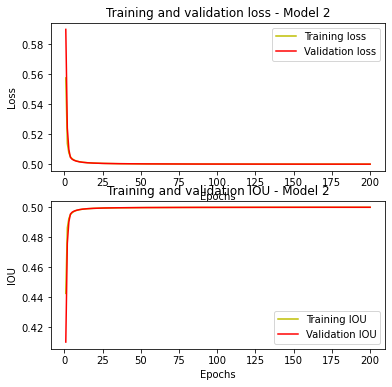

PermissionError: [Errno 13] Permission denied: 'model1_and2_loss_graph.png'

<Figure size 432x288 with 0 Axes>

In [29]:
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))
fig, (ax3, ax4) = plt.subplots(2, 1, figsize=(6, 6))

# loss1 = history1.history['loss']
# val_loss1 =  history1.history['val_loss']
# epochs = range(1, len(loss1) + 1)
# ax1.plot(epochs, loss1, 'y', label='Training loss')
# ax1.plot(epochs, val_loss1, 'r', label='Validation loss')
# ax1.set_title('Training and validation loss - Model 1')
# ax1.set_xlabel('Epochs')
# ax1.set_ylabel('Loss')
# ax1.legend()


# acc1 =  history1.history['iou_score']
# val_acc1 =  history1.history['val_iou_score']
# ax2.plot(epochs, acc1, 'y', label='Training IOU')
# ax2.plot(epochs, val_acc1, 'r', label='Validation IOU')
# ax2.set_title('Training and validation IOU - Model 1')
# ax2.set_xlabel('Epochs')
# ax2.set_ylabel('IOU')
# ax2.legend()

loss2 = history2.history['loss']
val_loss2 =  history2.history['val_loss']
epochs = range(1, len(loss2) + 1)
ax3.plot(epochs, loss2, 'y', label='Training loss')
ax3.plot(epochs, val_loss2, 'r', label='Validation loss')
ax3.set_title('Training and validation loss - Model 2')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Loss')
ax3.legend()


acc2 =  history2.history['iou_score']
val_acc2 =  history2.history['val_iou_score']
ax4.plot(epochs, acc2, 'y', label='Training IOU')
ax4.plot(epochs, val_acc2, 'r', label='Validation IOU')
ax4.set_title('Training and validation IOU - Model 2')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('IOU')
ax4.legend()

plt.show()
plt.savefig('model1_and2_loss_graph.png')